In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import pycocotools.coco as coco
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

ModuleNotFoundError: No module named 'pycocotools'

In [5]:
from __future__ import division
import argparse
import copy
import os
import os.path as osp
import time

import mmcv
import torch
from mmcv import Config
from mmcv.runner import init_dist

from mmdet import __version__
from mmdet.apis import set_random_seed, train_detector
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.utils import collect_env, get_root_logger


ImportError: cannot import name 'init_dist'

In [3]:
dataset_type = 'YTVOSDataset'
data_root = '/media/ssd/vis/'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)

        
yt_data = YTVOSDataset(ann_file=data_root + 'annotations/instances_train_sub.json',
        img_prefix=data_root + 'train/JPEGImages',
        img_scale=(640, 360),
        img_norm_cfg=img_norm_cfg,
        size_divisor=32,
        flip_ratio=0.5,
        with_mask=True,
        with_crowd=True,
        with_label=True,
        with_track=True)

loading annotations into memory...
Done (t=12.02s)
creating index...
index created!


KeyboardInterrupt: 

In [4]:
data = yt_data.__getitem__(101)

In [5]:
data.keys()

dict_keys(['gt_masks', 'gt_bboxes_ignore', 'ref_bboxes', 'ref_obj_ids', 'gt_bboxes', 'ref_img_meta', 'img_meta', 'ref_img', 'img', 'obj_ids', 'ref_bboxes_ignore', 'ref_masks', 'gt_labels', 'ref_labels'])

In [11]:
np.unique(data['gt_labels'].data)

array([30])

In [25]:
mask = data['ref_masks'].data
mask.shape

(3, 384, 640)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


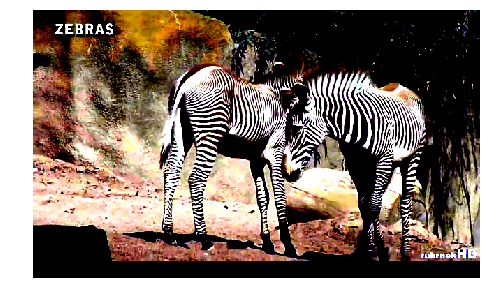

In [33]:
I = data['img'].data.numpy().transpose(1, 2, 0)
plt.axis('off')
plt.imshow(I)
plt.show()

In [32]:
print(data['obj_ids'].data, data['ref_obj_ids'].data)

tensor([7, 9]) tensor([7, 8, 9])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


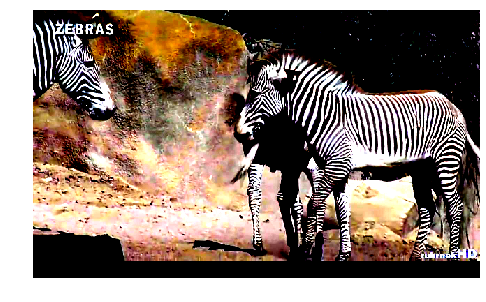

In [30]:
I = data['ref_img'].data.numpy().transpose(1, 2, 0)
plt.axis('off')
plt.imshow(I)
plt.show()

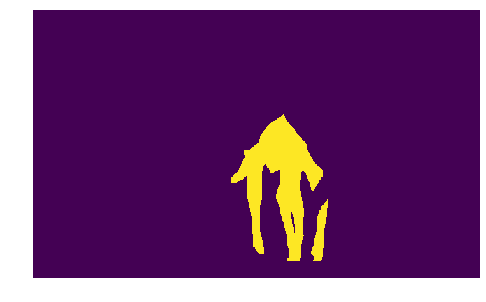

In [35]:
plt.axis('off')
plt.imshow(mask[2])
plt.show()

In [16]:
vid_id = yt_data.vid_infos[101]['id']
ann_ids = yt_data.ytvos.getAnnIds(vidIds=[vid_id])
ann_info = yt_data.ytvos.loadAnns(ann_ids)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AttributeError: module 'pycocotools.coco' has no attribute 'showAnns'

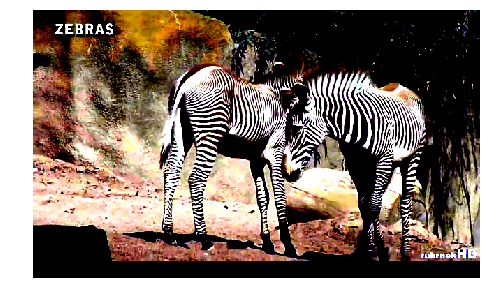

In [4]:
import json

with open('/media/ssd/vis/annotations/instances_train_sub.json') as json_file:
    data = json.load(json_file)

Mouse images


In [5]:
mouse = dict(info=data['info'], licenses=data['licenses'], categories=data['categories'] )

In [6]:
data['videos'][0].keys()

dict_keys(['width', 'length', 'date_captured', 'license', 'flickr_url', 'file_names', 'id', 'coco_url', 'height'])

In [ ]:
new_train['videos'] = data['videos'][:1900]

In [9]:
mouses_vid_ids = [ann['video_id'] for ann in data['annotations'] if ann['category_id']==36]


In [20]:
mouse['videos'] = [v for v in new_val['videos'] if v['id'] in mouses_vid_ids]

In [21]:
with open('/media/ssd/vis/annotations/mouse.json', 'w') as outfile:
    json.dump(mouse, outfile)

In [84]:
widths = dict()
heights = dict()
for v in data['videos']:
    w = v['width']
    if w not in widths:
        widths[w] = 1
    else:
        widths[w] = widths[w] + 1
        
    h = v['height']
    if h not in heights:
        heights[h] = 1
    else:
        heights[h] = heights[h] + 1
print(len(data['videos']))        
print(widths)
print(heights)
    

2238
{1280: 2081, 960: 69, 1920: 8, 406: 23, 1152: 3, 720: 1, 320: 1, 432: 1, 1080: 2, 1272: 1, 480: 8, 1270: 12, 600: 1, 640: 18, 540: 1, 490: 3, 1278: 3, 426: 2}
{576: 1, 240: 1, 358: 1, 360: 30, 716: 1, 718: 1, 720: 2183, 1080: 8, 594: 1, 404: 5, 406: 1, 544: 1, 600: 1, 640: 1, 672: 1, 264: 1}


In [86]:
import numpy as np
instances = dict()
for ann in data['annotations']:
    instances.setdefault(ann['video_id'], 0)
    instances[ann['video_id']] += 1
 
insts = instances.values()
insts = list(insts)
np.unique(insts, return_counts=True)



(array([1, 2, 3, 4, 5, 6]), array([1105,  835,  209,   77,    8,    4]))

In [87]:
inst13 = list(instances.keys())[list(instances.values()).index(4)]

print(instances[inst13])
dense_vids = [v for v in data['videos'] if v['id'] == inst13]
print(data['videos'][0])
print(len(dense_vids))
print(dense_vids)



4
{'license': 1, 'coco_url': '', 'id': 1, 'date_captured': '2019-04-11 00:55:41.903902', 'width': 1280, 'height': 720, 'length': 20, 'file_names': ['0043f083b5/00000.jpg', '0043f083b5/00005.jpg', '0043f083b5/00010.jpg', '0043f083b5/00015.jpg', '0043f083b5/00020.jpg', '0043f083b5/00025.jpg', '0043f083b5/00030.jpg', '0043f083b5/00035.jpg', '0043f083b5/00040.jpg', '0043f083b5/00045.jpg', '0043f083b5/00050.jpg', '0043f083b5/00055.jpg', '0043f083b5/00060.jpg', '0043f083b5/00065.jpg', '0043f083b5/00070.jpg', '0043f083b5/00075.jpg', '0043f083b5/00080.jpg', '0043f083b5/00085.jpg', '0043f083b5/00090.jpg', '0043f083b5/00095.jpg'], 'flickr_url': ''}
1
[{'license': 1, 'coco_url': '', 'id': 24, 'date_captured': '2019-04-11 00:55:41.903902', 'width': 1280, 'height': 720, 'length': 19, 'file_names': ['0358b938c1/00140.jpg', '0358b938c1/00145.jpg', '0358b938c1/00150.jpg', '0358b938c1/00155.jpg', '0358b938c1/00160.jpg', '0358b938c1/00165.jpg', '0358b938c1/00170.jpg', '0358b938c1/00175.jpg', '0358b938c1

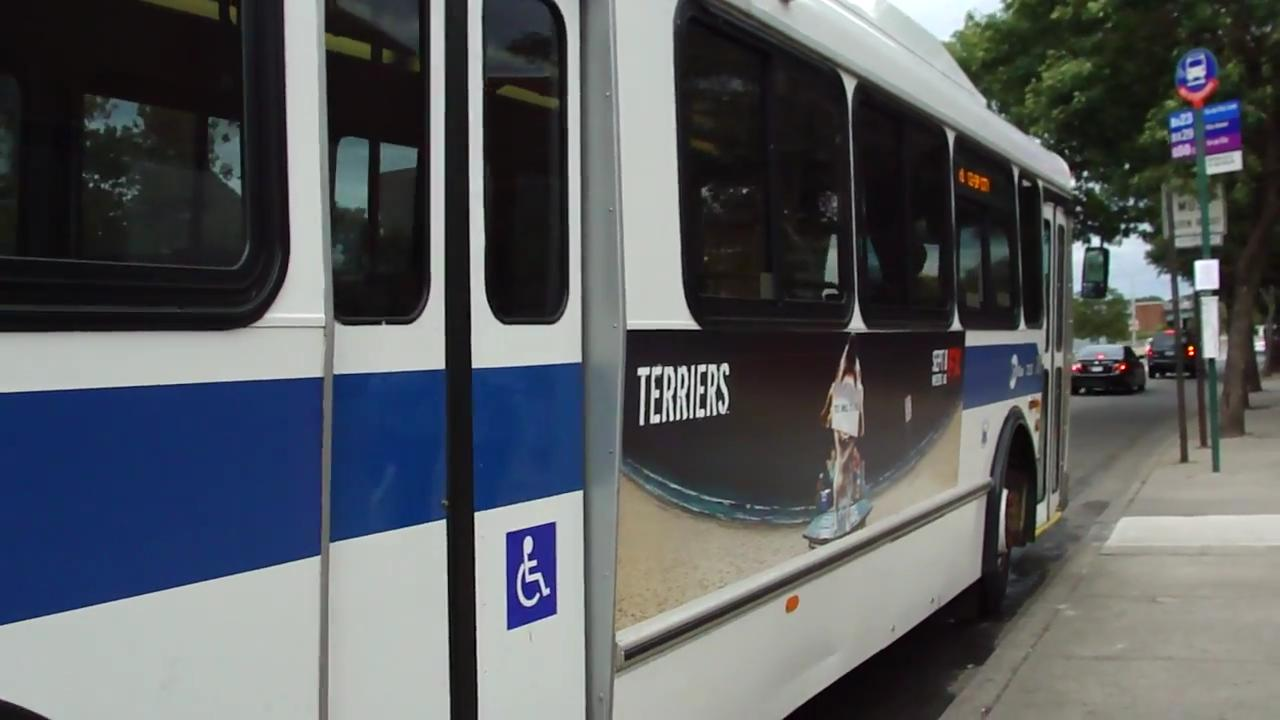

In [89]:
import matplotlib.pyplot as plt
data_root = '/home/fothar/data/vis/'
img_prefix=data_root + 'train/JPEGImages/',

from IPython.display import Image
I = Image("/home/fothar/data/vis/train/JPEGImages/0043f083b5/00075.jpg")
I

In [72]:
<img src="/home/fothar/data/vis/train/JPEGImages/04735c5030/00020.jpg",width=60,height=60>

SyntaxError: invalid syntax (<ipython-input-72-2fd04b6148a7>, line 1)

In [129]:
data['videos'] = [v for v in data['videos'] if v['width']==1280]

In [15]:
new_train = dict(info=data['info'], licenses=data['licenses'], categories=data['categories'] )
new_val = dict(info=data['info'], licenses=data['licenses'], categories=data['categories'] )
mini_val = dict(info=data['info'], licenses=data['licenses'], categories=data['categories'] )


In [16]:
len(data['videos'])

2238

In [17]:
new_train['videos'] = data['videos'][:1900]
new_val['videos'] = data['videos'][1900:]
mini_val['videos'] = data['videos'][2050:]



In [133]:
new_train['annotations'] = [ann for ann in data['annotations'] for vid in new_train['videos'] if ann['video_id'] == vid['id']]
new_val['annotations'] = [ann for ann in data['annotations'] for vid in new_val['videos'] if ann['video_id'] == vid['id']]
mini_val['annotations'] = [ann for ann in data['annotations'] for vid in mini_val['videos'] if ann['video_id'] == vid['id']]

In [134]:
len(new_train['annotations'])

3217

In [135]:
len(new_val['annotations'])

300

In [136]:
len(mini_val['annotations'])

53

In [137]:
def remap_vid_ids(new_data):
    ann_ids = [ann['id'] for ann in new_data['annotations']]
    ann_id_map = {x:i+1 for i,x in enumerate(ann_ids)}
    vid_ids = [vid['id'] for vid in new_data['videos']]
    vid_id_map = {x:i+1 for i,x in enumerate(vid_ids)}
    
    
    for ann in new_data['annotations']:
        ann['id'] = ann_id_map[ann['id']]
        ann['video_id'] = vid_id_map[ann['video_id']]
        
    for vid in new_data['videos']:
        vid['id'] = vid_id_map[vid['id']]
        
remap_vid_ids(new_train)
remap_vid_ids(new_val)
remap_vid_ids(mini_val)

In [47]:
with open('/media/hdd/aron/vis/annotations/instances_train_minusminval_filtered.json', 'w') as outfile:
    json.dump(new_train, outfile)
    
with open('/media/hdd/aron/vis/annotations/instances_minval_filtered.json', 'w') as outfile:
    json.dump(new_val, outfile)
with open('/media/hdd/aron/vis/annotations/instances_minival_filtered.json', 'w') as outfile:
    json.dump(mini_val, outfile)

In [48]:

def _vidframeToImage(vid, frame_id):
    return dict(
        license = vid['license'], 
        width = vid['width'], 
        coco_url = vid['coco_url'], 
        id = vid['id'] * 100 + frame_id, 
        height = vid['height'], 
        date_captured = vid['date_captured'], 
        file_name = vid['file_names'][frame_id], 
        flickr_url = vid['flickr_url']
    )

def _vidannToAnn(vidann, frame_id):
    return dict(
        segmentation = vidann['segmentations'][frame_id], 
        id = vidann['id'] * 100 + frame_id, 
        bbox = vidann['bboxes'][frame_id], 
        category_id = vidann['category_id'], 
        image_id = vidann['video_id'] * 100 + frame_id,
        area = vidann['areas'][frame_id], 
        iscrowd = vidann['iscrowd']
    )
            
    
def ytvos_to_coco(ytpath, cocopath):
    with open(ytpath) as json_file:
        ytvis_data = json.load(json_file)
    coco_data = dict(categories=ytvis_data['categories'],
                    info=ytvis_data['info'],
                    licenses=ytvis_data['licenses'])
    
    coco_images = []
    for vid in ytvis_data['videos']:
        for frame_id, _ in enumerate(vid['file_names']):
            coco_images.append(_vidframeToImage(vid, frame_id))
            
    coco_data['images'] = coco_images 
    
    coco_annotations = []
    
    frame_max = 0
    for ann in ytvis_data['annotations']:
        l = len(ann['segmentations'])
        if l > frame_max:
            frame_max = l
        for frame_id, _ in enumerate(ann['segmentations']):
            coco_ann = _vidannToAnn(ann, frame_id)
            #print(coco_ann['segmentation'])
            if not coco_ann['segmentation'] == None:
                coco_annotations.append(coco_ann)
        
    coco_data['annotations'] = coco_annotations
    print(frame_max)
    
    #for cc in coco_data['annotations']:
    #    print(type(cc['segmentation']['counts']))
    
    with open(cocopath, 'w') as outfile:
        json.dump(coco_data, outfile)
        
ytvos_to_coco('/media/hdd/aron/vis/annotations/instances_minval_filtered.json', '/media/hdd/aron/vis/annotations/instances_minval_filtered_coco.json')
ytvos_to_coco('/media/hdd/aron/vis/annotations/instances_minival_filtered.json', '/media/hdd/aron/vis/annotations/instances_minival_filtered_coco.json')
ytvos_to_coco('/media/hdd/aron/vis/annotations/instances_train_minusminval_filtered.json', '/media/hdd/aron/vis/annotations/instances_train_minusminval_filtered_coco.json')

36
36
36


In [138]:
import numpy as np
instances = dict()
for ann in new_train['annotations']:
    instances.setdefault(ann['video_id'], 0)
    instances[ann['video_id']] += 1
 
insts = instances.values()
insts = list(insts)
inst_vid_list = [[], [], [], [], [], []]


for vid_id, inst_number in instances.items():
    
    inst_vid_list[inst_number-1].append(vid_id)

for i,v_ids  in enumerate(inst_vid_list):
    inst_vid_list[i] = v_ids[:100]
    

inst_vid_list = sum(inst_vid_list, [])



balanced_train = dict(info=data['info'], licenses=data['licenses'], categories=data['categories'] )
balanced_train['videos'] = [vid for vid in new_train['videos'] if vid['id'] in inst_vid_list]

balanced_train['annotations'] = [ann for ann in new_train['annotations'] for vid in balanced_train['videos'] if ann['video_id'] == vid['id']]
remap_vid_ids(balanced_train)

with open('/media/hdd/aron/vis/annotations/instances_train_balanced_filtered.json', 'w') as outfile:
    json.dump(balanced_train, outfile)


In [140]:
ytvos_to_coco('/media/hdd/aron/vis/annotations/instances_train_balanced_filtered.json', '/media/hdd/aron/vis/annotations/instances_train_balanced_filtered_coco.json')


36


In [151]:
test_list = list(range(10))
seq_len = 3

In [152]:
test_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [154]:
test_list[seq_len-1::seq_len]

[2, 5, 8]

In [160]:
si = test_list.index(5)
si

5

In [161]:
test_list[si+1 - seq_len:si+1]

[3, 4, 5]

In [22]:
s = ""
for i in range(100):
    s += '"1/{}.png", '.format(i+120)
    

In [23]:
s


'"1/120.png", "1/121.png", "1/122.png", "1/123.png", "1/124.png", "1/125.png", "1/126.png", "1/127.png", "1/128.png", "1/129.png", "1/130.png", "1/131.png", "1/132.png", "1/133.png", "1/134.png", "1/135.png", "1/136.png", "1/137.png", "1/138.png", "1/139.png", "1/140.png", "1/141.png", "1/142.png", "1/143.png", "1/144.png", "1/145.png", "1/146.png", "1/147.png", "1/148.png", "1/149.png", "1/150.png", "1/151.png", "1/152.png", "1/153.png", "1/154.png", "1/155.png", "1/156.png", "1/157.png", "1/158.png", "1/159.png", "1/160.png", "1/161.png", "1/162.png", "1/163.png", "1/164.png", "1/165.png", "1/166.png", "1/167.png", "1/168.png", "1/169.png", "1/170.png", "1/171.png", "1/172.png", "1/173.png", "1/174.png", "1/175.png", "1/176.png", "1/177.png", "1/178.png", "1/179.png", "1/180.png", "1/181.png", "1/182.png", "1/183.png", "1/184.png", "1/185.png", "1/186.png", "1/187.png", "1/188.png", "1/189.png", "1/190.png", "1/191.png", "1/192.png", "1/193.png", "1/194.png", "1/195.png", "1/196.png"